<a href="https://colab.research.google.com/github/222yujin/colab_ML/blob/main/02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **지도학습**
훈련하기 위한 데이터와 정답이 필요함

데이터와 정답을 **입력**과 **타깃** 이라고 하고

이 둘을 합쳐 **훈련데이터**라고 함

# **비지도학습**

타깃 없이 입력 데이터만 사용

이런 종류의 알고리즘은 정답을 사용하지 않으므로 무언가를 맞힐 순 없음

대신 데이터를 잘 파악하거나 변형하는데 도움을 줌

**테스트세트**

평가에 사용하는 데이터

**훈련세트**

훈련에 사용되는 데이터

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l ,w in zip(fish_length,fish_weight)]
fish_target = [1]*35 +[0]*14

##여기서 하나의 생선 데이터를 샘플이라고 함 => 총 49개의 샘플이 있음

##35개는 훈련세트, 14개는 테스트 세트로 사용

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)

##r정확도가 0.0이 나옴
## 훈련세트에는 빙어가 하나도 들어있지 않아서 빙어 없이 모델을 훈련시켰기때문,,!


0.0

**샘플링편향**

훈련세트와 테스트 세트에 샘플이 골고루 섞여있지 않고 샘플링이 한쪽으로 치우쳐져있는 상황

In [4]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [8]:
print(input_arr.shape)
##(49,2) (샘플수,특성수)

(49, 2)


input_arr와 target_arr에서 같은 위치는 함께 선택되어야한다

입력과 타깃이 한 쌍이 되어야함

In [5]:
#np,random.seed(42) 일정한 결과를 얻기 위한 시드

index = np.arange(49)##0-48까지의 정수배열
np.random.shuffle(index) ##index배열을 셔플
##[ 6 16 46 25 24 27 11  9 43 41  8  7  5 18  2 13 26 48 29  4 42 20 38 37 17 21 28 23 30  1 14 35 36 33 15 19 32 39 31  3 22 45 34  0 10 40 44 47 12]

train_input = input_arr[index[:35]] ## index 배열의 34번째까지 해당되는 숫자들이 input_arr의 인덱스가 되어 해당하는 데이터가 들어감
train_target= target_arr[index[:35]]


test_input = input_arr[index[35:]]
test_target= target_arr[index[35:]]


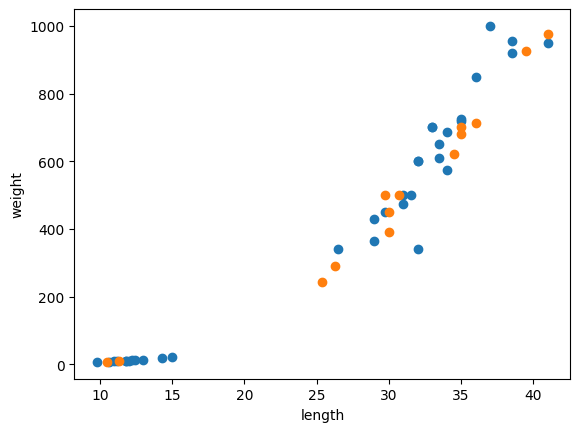

In [7]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1]) #2차원배열의 행=> 전체 인덱스 모두 선택, 열 => 특성만 선택(0과 1)
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)

## 훈련 세트와 테스트세트의 데이터를 섞어서 훈련후 모델을 테스트 해보면 정확도가 높아졌음

1.0